In [1]:
# Importing libraries
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Create a path to where your data is stored.
path = r'/Users/marika/Datasets'

# Load the datasets
df_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-weather-prediction-dataset-processed.csv')
pleasant_weather = pd.read_csv('/Users/marika/Data Sets/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

# Drop the date and month columns from df_weather
df_weather = df_weather.drop(columns=['DATE', 'MONTH'])

# Drop the date column from pleasant_weather
pleasant_weather = pleasant_weather.drop(columns=['DATE'])

# Define X and y
X = df_weather.values
y = pleasant_weather.values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Initialize and fit the decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the training and test sets
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Calculate accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Training Accuracy: 1.0
Test Accuracy: 0.6413943355119825


In [5]:
print(f"Decision Tree Depth: {decision_tree.get_depth()}")
print(f"Number of Leaves: {decision_tree.get_n_leaves()}")

if train_acc > test_acc and decision_tree.get_depth() > 30:  
    print("The decision tree may need pruning due to high complexity and overfitting.")
else:
    print("The decision tree appears to be balanced.")

Decision Tree Depth: 28
Number of Leaves: 4986
The decision tree appears to be balanced.


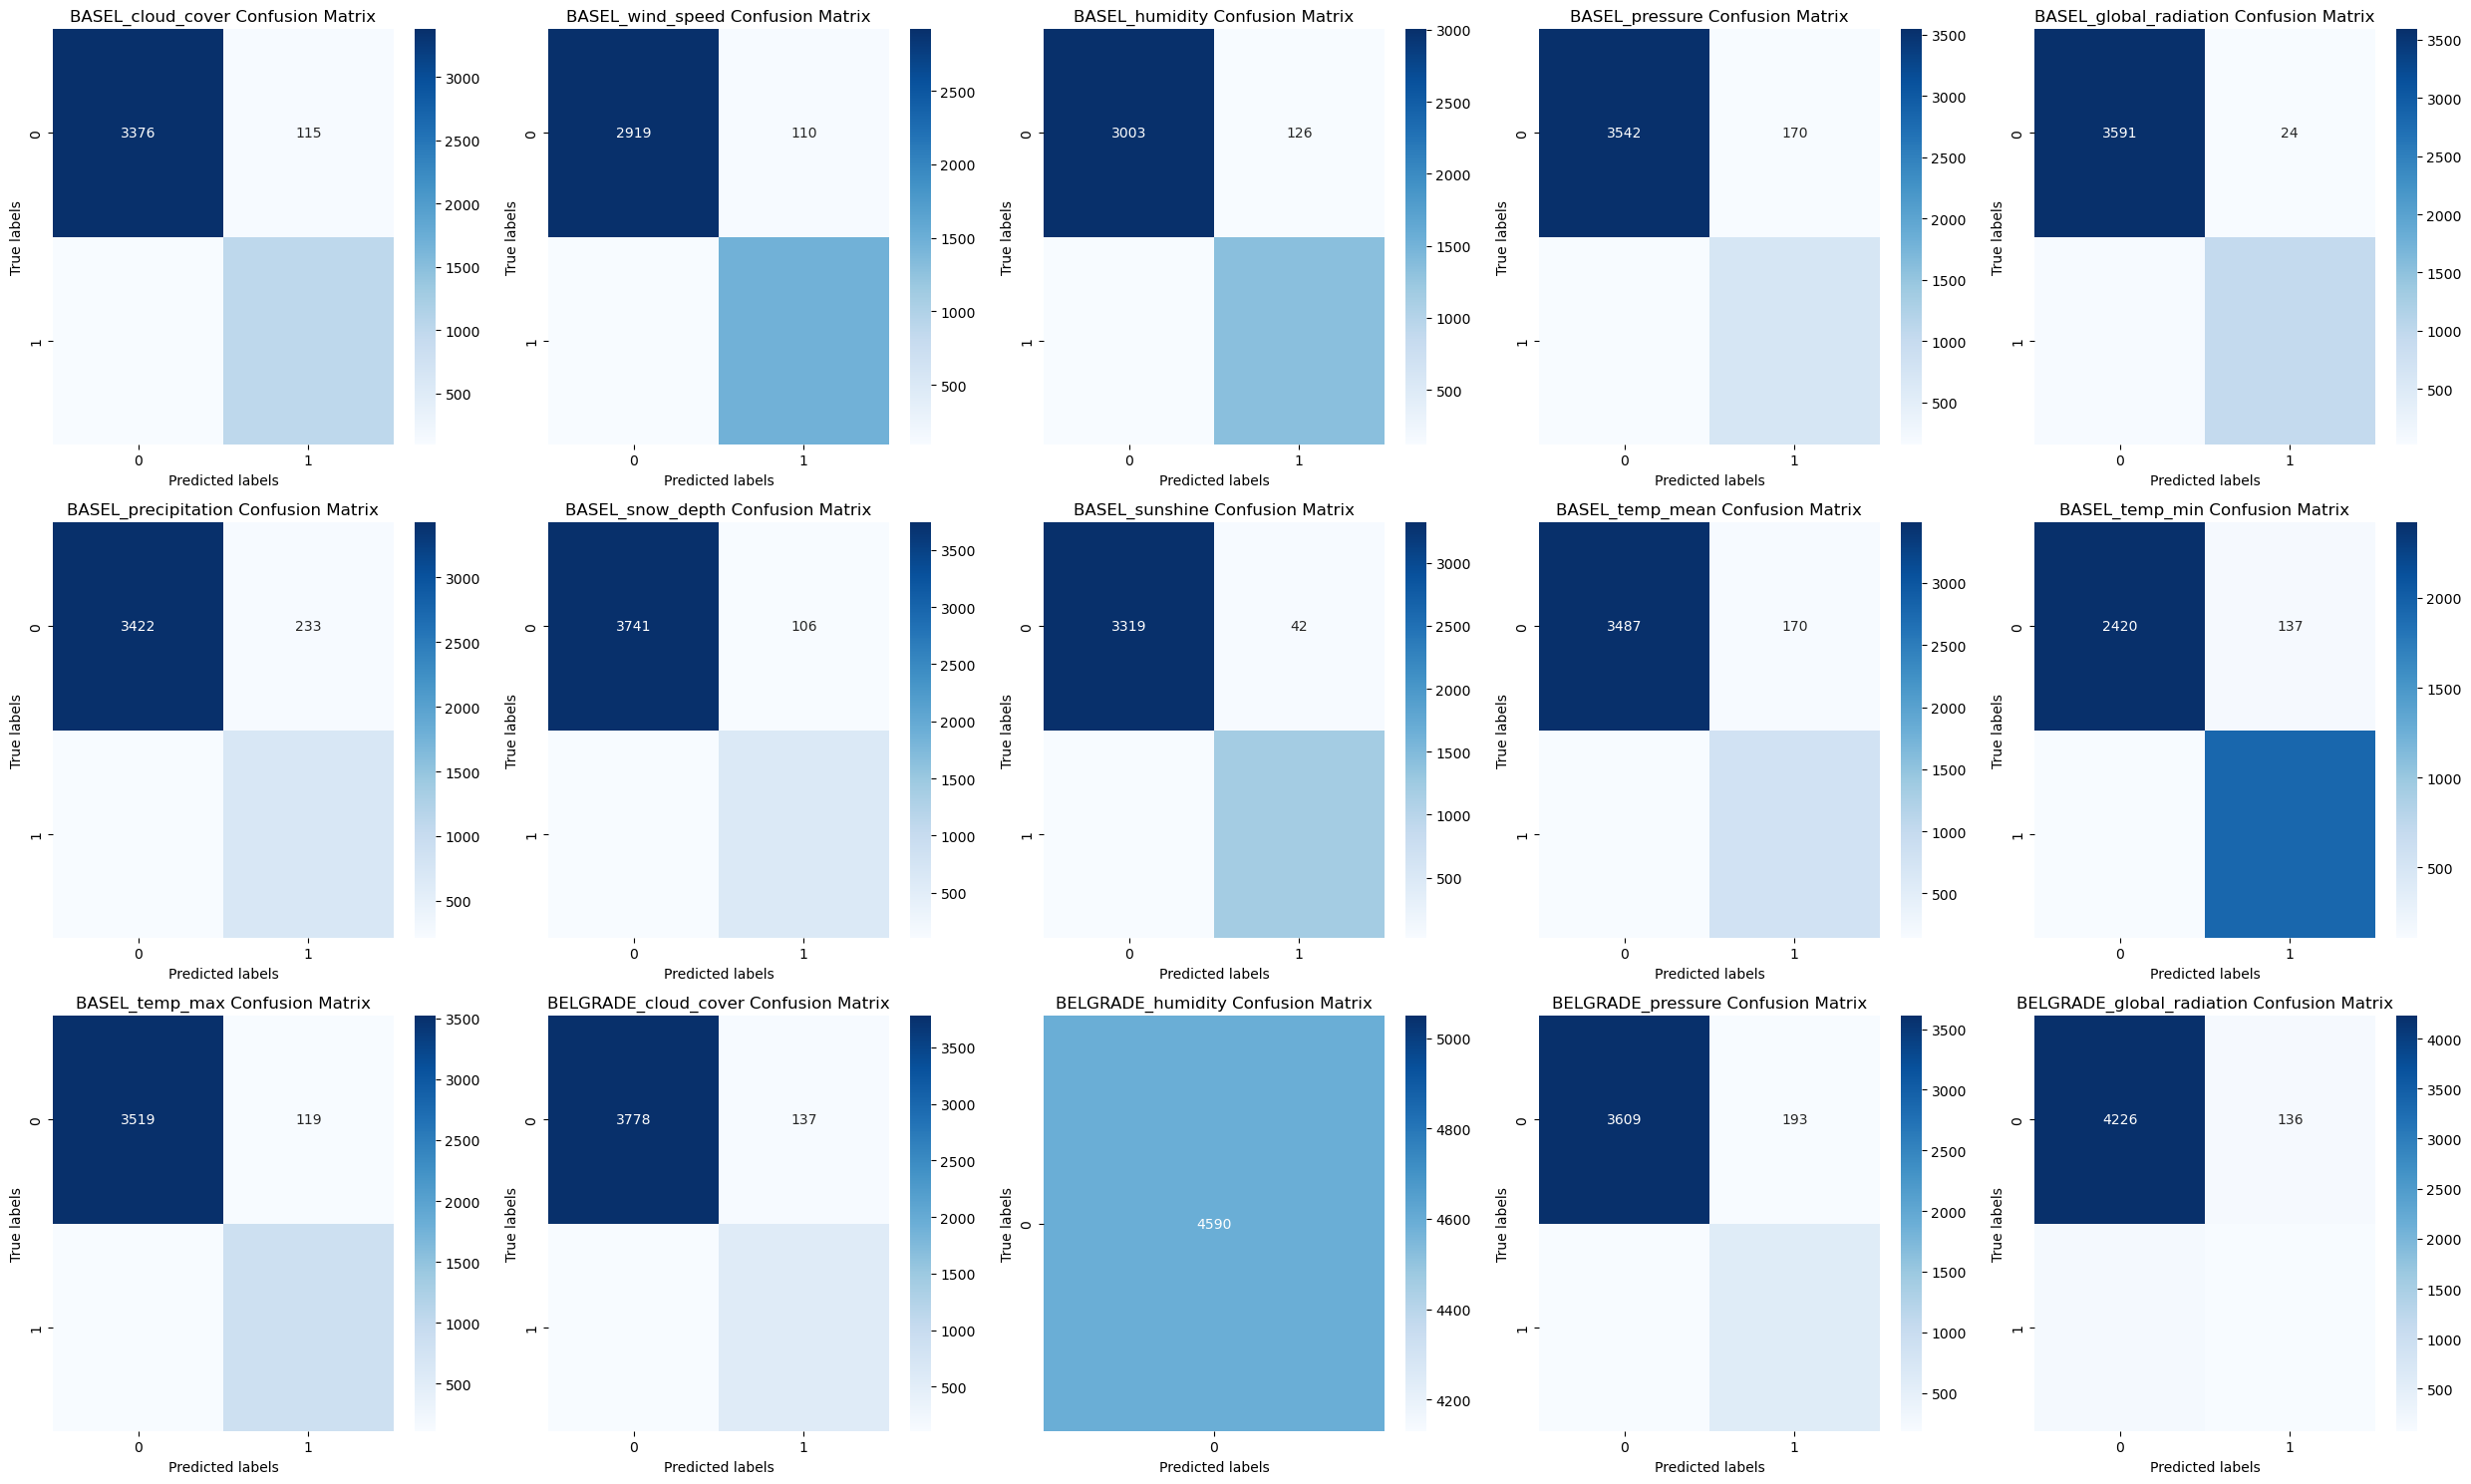

<Figure size 640x480 with 0 Axes>

In [6]:
# Extract location names from df_weather columns
locations = list(df_weather.columns)

# Plot confusion matrices for each location
figure, ax = plt.subplots(3, 5, figsize=(25, 15))  
count = 0

for i in range(3):
    for j in range(5):
        if count >= len(locations):
            break
        
        # Generate confusion matrix for each location
        name = locations[count]
        cm = confusion_matrix(y_test[:, count], y_test_pred[:, count])
        
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j], cmap="Blues")
        
        # Labels, title, and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Confusion Matrix')
        
        count += 1

plt.tight_layout()
plt.show()

# Optionally save the figure
plt.savefig("decision_tree_confusion_matrices.png")

# Tree Depth and Complexity

# Depth of 28: 
A tree depth of 28 is relatively deep, which could suggest that the model is capturing a lot of specific patterns in the data. This could indicate a risk of overfitting, especially if the training accuracy is significantly higher than the test accuracy.

# Number of Leaves (4,986): 
The large number of leaves also suggests a highly complex model. Each leaf represents a decision point where the model makes a final prediction, and with so many leaves, the model is likely making very specific decisions based on the training data.

# Training Accuracy: 1.0 (100%)

# Test Accuracy: 0.6414 (64.14%)

With such a high discrepancy between the training and test accuracy, pruning would likely be beneficial. It could simplify the model, reduce overfitting, and potentially lead to better performance on the test set.